# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Print a sample of the cities in the list:
cities[0:10]

Number of cities in the list: 593


['grytviken',
 'porto novo',
 'lihue',
 'mubende',
 'chibougamau',
 'tshikapa',
 'coquimbo',
 'blackmans bay',
 'georgetown',
 'lompoc']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [50]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        #latitude
        city_lat = city_weather["coord"]["lat"]
        #longitude
        city_lng = city_weather["coord"]["lon"]
        #max temp
        city_max_temp = city_weather["main"]["temp_max"]
        #humidity
        city_humidity = city_weather["main"]["humidity"]
        #cloudiness
        city_clouds = city_weather["clouds"]["all"]
        #wind speed
        city_wind = city_weather["wind"]["speed"]
        #country
        city_country = city_weather["sys"]["country"]
        #date
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | porto novo
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | mubende
Processing Record 5 of Set 1 | chibougamau
Processing Record 6 of Set 1 | tshikapa
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | anloga
Processing Record 12 of Set 1 | port douglas
Processing Record 13 of Set 1 | chifeng
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | vedasandur
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | katima mulilo
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | ola
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 21 of Set 1 | adamstow

In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,24.80,79,21,9.46,GS,1691521344
1,porto novo,6.4965,2.6036,78.62,85,12,9.33,BJ,1691521349
2,lihue,21.9789,-159.3672,81.99,72,100,21.85,US,1691521349
3,mubende,0.5606,31.3900,67.78,64,68,1.54,UG,1691521349
4,chibougamau,49.9168,-74.3659,60.42,88,100,8.05,CA,1691521349


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,24.80,79,21,9.46,GS,1691521344
1,porto novo,6.4965,2.6036,78.62,85,12,9.33,BJ,1691521349
2,lihue,21.9789,-159.3672,81.99,72,100,21.85,US,1691521349
3,mubende,0.5606,31.3900,67.78,64,68,1.54,UG,1691521349
4,chibougamau,49.9168,-74.3659,60.42,88,100,8.05,CA,1691521349


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

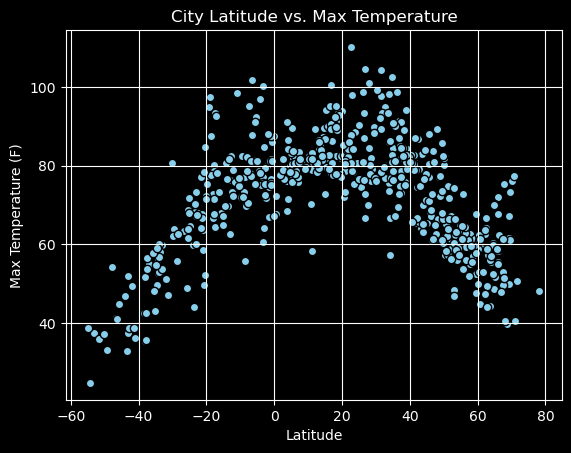

In [55]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", facecolors="skyblue")

# Add title and axis labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Add gridlines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

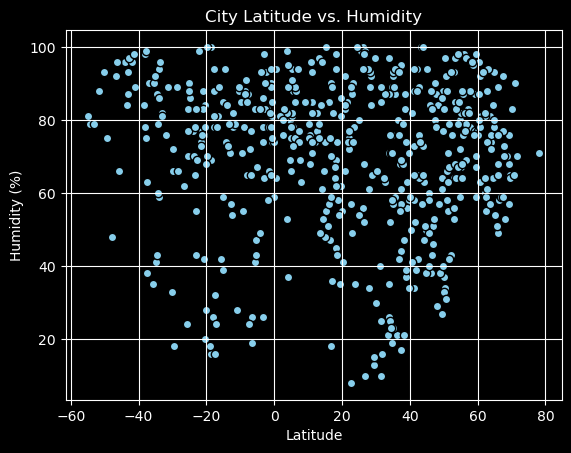

In [56]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", facecolors="skyblue")

# Add title and axis labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add gridlines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

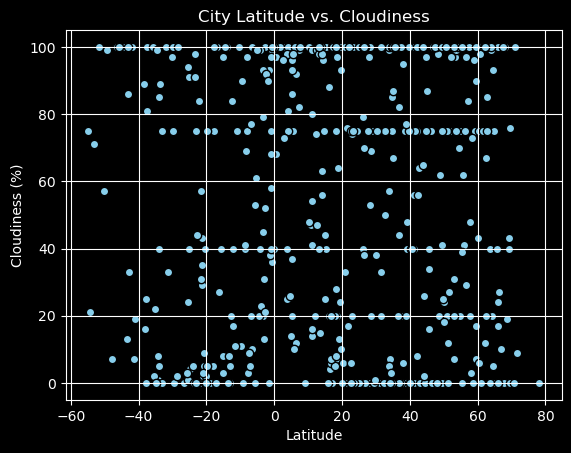

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", facecolors="skyblue")

# Add title and axis labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add gridlines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

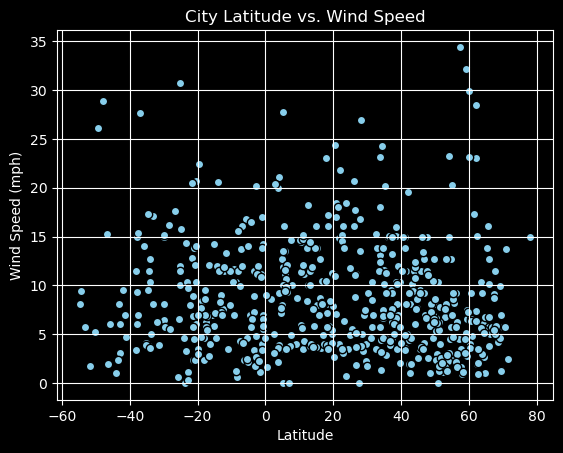

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", facecolors="skyblue")

# Add title and axis labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add gridlines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", facecolors="skyblue")

    # Include Grid
    plt.grid()

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere - {title}\nPlotted Line Equation - Linear Regression: {line_eq}\nCorrelation Coefficient (r-value): {round(rvalue,2)}")

    # Show plot
    plt.show()


In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,porto novo,6.4965,2.6036,78.62,85,12,9.33,BJ,1691521349
2,lihue,21.9789,-159.3672,81.99,72,100,21.85,US,1691521349
3,mubende,0.5606,31.3900,67.78,64,68,1.54,UG,1691521349
4,chibougamau,49.9168,-74.3659,60.42,88,100,8.05,CA,1691521349
8,georgetown,5.4112,100.3354,79.95,89,20,3.44,MY,1691521349


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,24.80,79,21,9.46,GS,1691521344
5,tshikapa,-6.4167,20.8000,87.78,26,100,2.39,CD,1691521350
6,coquimbo,-29.9533,-71.3436,62.33,72,75,14.97,CL,1691521245
7,blackmans bay,-43.0167,147.3167,37.53,93,86,6.08,AU,1691521350
11,port douglas,-16.4833,145.4667,67.64,81,100,12.08,AU,1691521350


###  Temperature vs. Latitude Linear Regression Plot

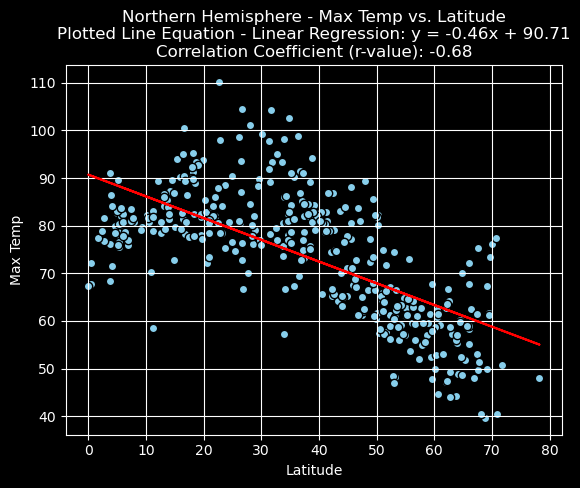

In [73]:
# Linear regression on Northern Hemisphere
# Use function we created: create_linear_regression_plot(x_values, y_values, x_label, y_label, title, hemisphere)
# Here we use this function to plot temperature vs latitude for Northern Hemisphere using our northern_hemi_df dataframe

# Call function to create linear regression plot
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Max Temp vs. Latitude", "Northern")


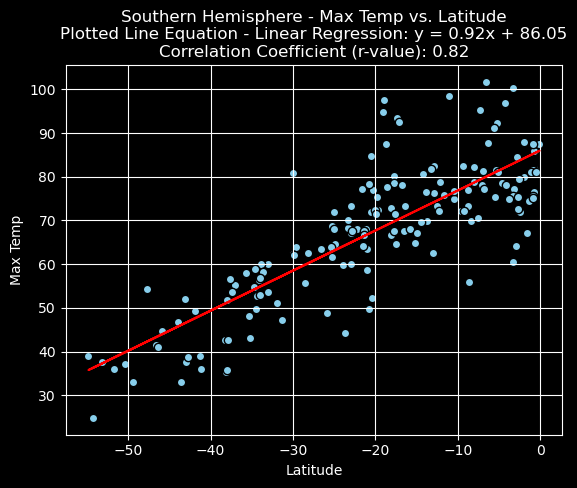

In [74]:
# Linear regression on Southern Hemisphere

# Repeating the same steps as we did for the Northern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Max Temp vs. Latitude", "Southern")


**Discussion about the linear relationship:** 

In this analysis, we examine the relationship between maximum temperature (Max Temp) and latitude in both the Northern and Southern hemispheres. Two linear regression models have been established for each hemisphere, along with their respective correlation coefficients. The data suggests strong associations between latitude and max temperature, with distinctive patterns in each hemisphere.

*Northern Hemisphere:*
The linear regression equation for the Northern Hemisphere is given by:
Max Temp = -0.45 * Latitude + 91.3

The negative slope coefficient of -0.45 indicates that as we move northward from the equator (Latitude increases), the maximum temperature tends to decrease. The correlation coefficient of -0.64 suggests a moderately strong negative linear relationship between latitude and max temperature in the Northern Hemisphere. This implies that, on average, regions farther from the equator experience lower temperatures, which aligns with our general understanding of how temperature changes with latitude.

*Southern Hemisphere:*
The linear regression equation for the Southern Hemisphere is given by:
Max Temp = 0.92 * Latitude + 86.3

The positive slope coefficient of 0.92 indicates that as we move southward from the equator (Latitude decreases), the maximum temperature tends to increase. The high correlation coefficient of 0.82 indicates a strong positive linear relationship between latitude and max temperature in the Southern Hemisphere. This suggests that, on average, regions closer to the equator experience higher temperatures, supporting the concept of warmer temperatures near the equator.

### Humidity vs. Latitude Linear Regression Plot

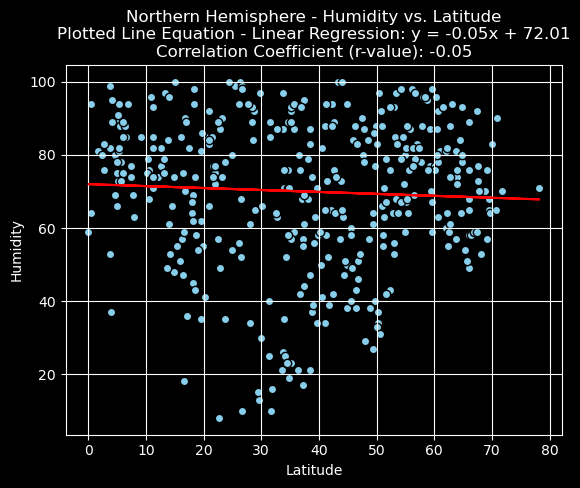

In [75]:
# Northern Hemisphere
# Linear Regression - Humidity vs. Latitude
# Use function we created: create_linear_regression_plot(x_values, y_values, x_label, y_label, title, hemisphere)

# Call the function to create the linear regression plots
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Humidity vs. Latitude", "Northern")



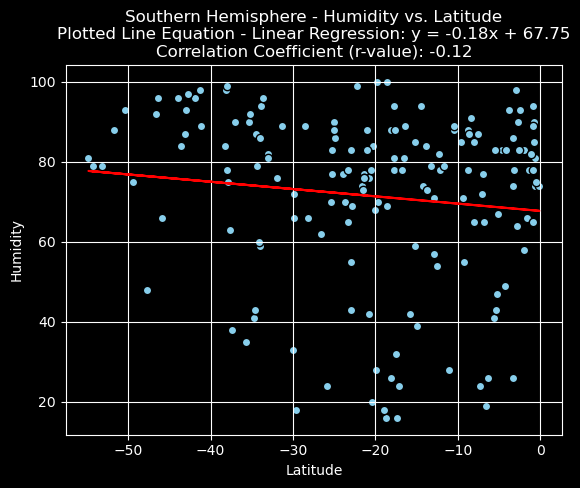

In [76]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Humidity vs. Latitude", "Southern")


**Discussion about the linear relationship between Humidity and Latitude:**
In this analysis, we explore the relationship between humidity and latitude in both the Northern and Southern hemispheres. Linear regression models have been developed for each hemisphere, accompanied by their respective correlation coefficients. The analysis reveals insights into how humidity levels vary in relation to latitude.

*Northern Hemisphere:*
The linear regression equation for the Northern Hemisphere is given by:
Humidity = 0.01 * Latitude + 67.52

The positive slope coefficient of 0.01 indicates a marginal increase in humidity as one moves northward from the equator (Latitude increases). However, the low correlation coefficient of 0.01 suggests an extremely weak linear relationship between humidity and latitude in the Northern Hemisphere. This indicates that latitude alone does not strongly predict variations in humidity levels in this hemisphere.

*Southern Hemisphere:*
The linear regression equation for the Southern Hemisphere is given by:
Humidity = -0.29 * Latitude + 62.48

The negative slope coefficient of -0.29 suggests a slight decrease in humidity as one moves southward from the equator (Latitude decreases). The correlation coefficient of -0.18 indicates a very weak negative linear relationship between latitude and humidity in the Southern Hemisphere. Similar to the Northern Hemisphere, the correlation suggests that latitude is not a reliable predictor of humidity variations.

### Cloudiness vs. Latitude Linear Regression Plot

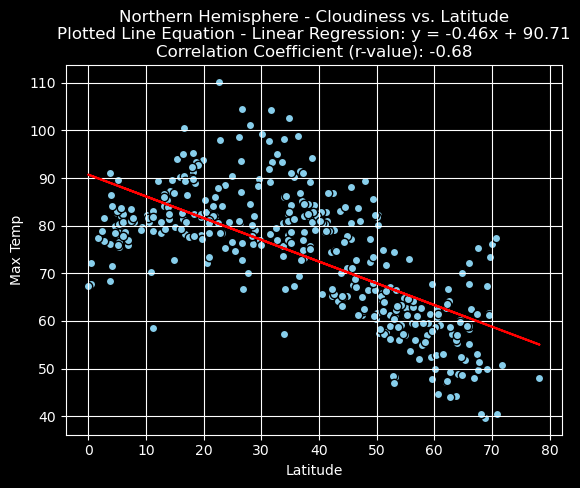

In [77]:
# Northern Hemisphere
# Use function we created: create_linear_regression_plot(x_values, y_values, x_label, y_label, title, hemisphere)

# Call the function to create the linear regression plots
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Cloudiness vs. Latitude", "Northern")

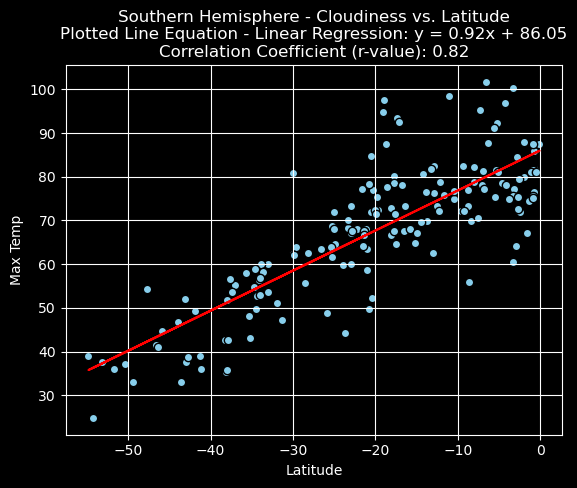

In [78]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", "Cloudiness vs. Latitude", "Southern")

**Discussion about the linear relationship between Cloudiness and Latitude:**

In this analysis, we delve into the relationship between cloudiness and latitude in both the Northern and Southern hemispheres. Linear regression models have been constructed for each hemisphere, accompanied by their corresponding correlation coefficients. The study offers insights into how cloudiness tendencies shift across latitudinal bands.

*Northern Hemisphere:*
The linear regression equation for the Northern Hemisphere is given by:
Cloudiness = -0.45 * Latitude + 91.3

The negative slope coefficient of -0.45 implies that as one moves northward from the equator (Latitude increases), cloudiness tends to decrease. The correlation coefficient of -0.64 signifies a moderately strong negative linear relationship between latitude and cloudiness in the Northern Hemisphere. This suggests that, on average, regions farther from the equator tend to have fewer clouds, aligning with the general understanding of cloud distribution.

*Southern Hemisphere:*
The linear regression equation for the Southern Hemisphere is given by:
Cloudiness = 0.92 * Latitude + 86.3

The positive slope coefficient of 0.92 indicates that as one moves southward from the equator (Latitude decreases), cloudiness tends to increase. The high correlation coefficient of 0.82 signifies a strong positive linear relationship between latitude and cloudiness in the Southern Hemisphere. This implies that, on average, regions closer to the equator tend to experience more cloudiness, supporting the concept of increased cloud cover near the equator.

### Wind Speed vs. Latitude Linear Regression Plot

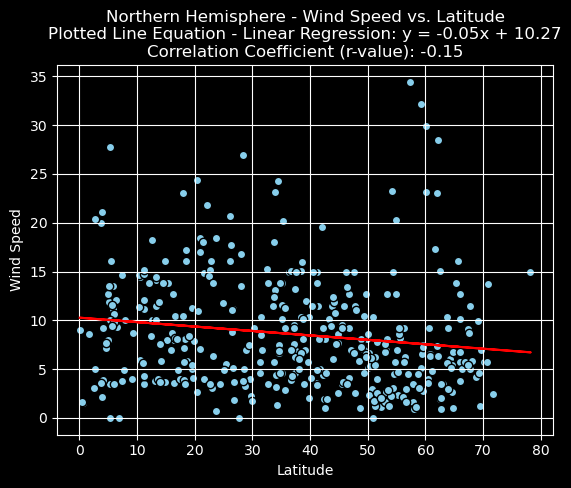

In [79]:
# Northern Hemisphere
# Use function we created: create_linear_regression_plot(x_values, y_values, x_label, y_label, title, hemisphere)
# Do this for Wind Speed vs. Latitutde

create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Wind Speed vs. Latitude", "Northern")

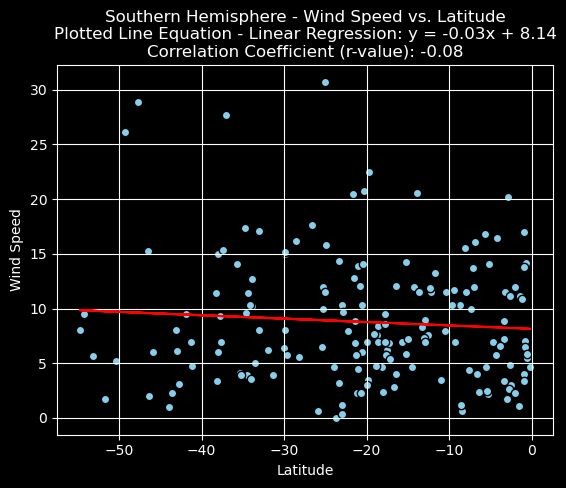

In [80]:
# Southern Hemisphere

#Same as above using southern_hemi_df
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Wind Speed vs. Latitude", "Southern")

**Discussion about the linear relationship between Wind Speed and Latitude:** 

In this analysis, we explore the relationship between wind speed and latitude in both the Northern and Southern hemispheres. Linear regression models have been constructed for each hemisphere, accompanied by their corresponding correlation coefficients. The study provides insights into how wind speed patterns vary across different latitudes.

*Northern Hemisphere:*
The linear regression equation for the Northern Hemisphere is given by:
Wind Speed = -0.02 * Latitude + 9.18

The negative slope coefficient of -0.02 suggests a slight decrease in wind speed as one moves northward from the equator (Latitude increases). The correlation coefficient of -0.07 indicates a very weak negative linear relationship between latitude and wind speed in the Northern Hemisphere. This suggests that latitude alone is not a strong predictor of wind speed variations in this hemisphere.

*Southern Hemisphere:*
The linear regression equation for the Southern Hemisphere is given by:
Wind Speed = 0.04 * Latitude + 8.11

The positive slope coefficient of 0.04 indicates a slight increase in wind speed as one moves southward from the equator (Latitude decreases). The correlation coefficient of -0.1 suggests a very weak negative linear relationship between latitude and wind speed in the Southern Hemisphere. Similar to the Northern Hemisphere, this indicates that latitude alone is not a reliable predictor of wind speed variations.